In [1]:
import os
os.chdir('/Users/tamarindo/Documents/School/Year3/Statistic/Project_midterm')
os.getcwd()

'/Users/tamarindo/Documents/School/Year3/Statistic/Project_midterm'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gender_df = pd.read_csv("worldbank_gender_2021.csv")
region_df = pd.read_excel("countries_regions.xlsx")

print("Gender dataset shape:", gender_df.shape)
print("Region dataset shape:", region_df.shape)

gender_df.head()

Gender dataset shape: (216, 196)
Region dataset shape: (217, 3)


,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)",Gender Ratio Class
0,Afghanistan,2021,6.51,58.74,33.60,12.00,2099.0,125.67,5.20,114.32,...,5.308000e+09,43.16,60.87,12.79,NaN,NaN,NaN,NaN,NaN,1.0
1,Albania,2021,16.54,41.47,18.36,21.89,5144.7,114.68,NaN,104.92,...,7.718000e+09,62.89,27.58,15.96,NaN,NaN,NaN,NaN,NaN,1.0
2,Algeria,2021,NaN,17.35,11.23,3.16,1433.7,108.76,20.68,104.83,...,3.746600e+10,40.86,2.10,1.61,NaN,NaN,NaN,NaN,NaN,1.0
3,American Samoa,2021,NaN,14.50,NaN,4.85,NaN,NaN,NaN,NaN,...,8.840000e+08,159.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2021,NaN,39.91,0.53,1.59,NaN,NaN,NaN,NaN,...,1.563000e+09,51.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
region_df.head()

,CountryName,Region,ThirdWorld
0,Afghanistan,South Asia,Yes
1,Albania,Eastern Europe,No
2,Algeria,Africa,No
3,American Samoa,Australia and Oceanea,No
4,Andorra,Western Europe,No


In [45]:
# Feature extraction
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# PCA

In [46]:
from sklearn.decomposition import PCA

In [48]:
# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

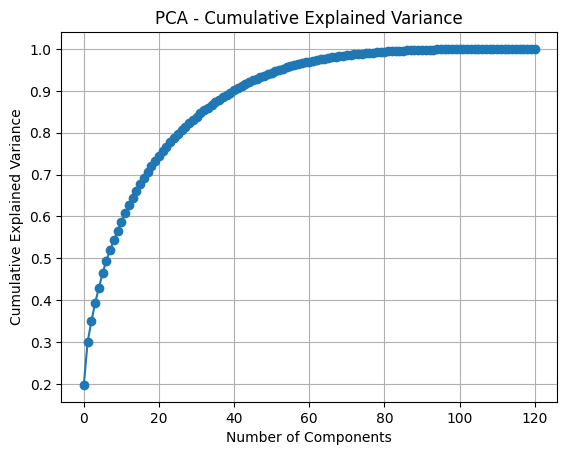

In [49]:
# Explain varience
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure()
plt.plot(
    np.cumsum(explained_variance_ratio),
    marker="o"
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid()
plt.show()

In [50]:
pca_final = PCA(n_components=0.8)
X_pca_final = pca_final.fit_transform(X_scaled)

X_pca_final.shape

(186, 27)

In [51]:
# PCA Loading
pca_loadings = pd.DataFrame(
    pca_final.components_.T,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(pca_final.n_components_)]
)

pca_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
Year,7.681803e-18,2.334773e-18,-6.336367e-18,-6.000941e-18,-2.049702e-17,-1.477782e-17,8.200864e-18,-1.326430e-18,1.883091e-17,7.566959e-18,...,7.623380e-18,-8.474950e-18,-3.424792e-17,-2.628210e-17,-1.079964e-17,-1.457552e-17,1.526762e-17,2.253768e-17,-3.780533e-18,-1.258149e-17
Agricultural land (% of land area),5.384150e-02,3.843797e-02,6.256265e-02,8.741548e-02,-1.280472e-01,-1.354887e-01,8.657909e-03,2.059272e-01,-3.686067e-02,6.524144e-02,...,-2.779483e-02,5.194393e-02,4.003566e-02,-1.425703e-01,-2.509845e-01,-1.211742e-01,-6.589169e-02,-7.822410e-02,-2.340454e-02,3.090168e-02
"Agriculture, forestry, and fishing, value added (% of GDP)",1.524610e-01,4.703353e-02,-7.397025e-03,9.316823e-02,1.450180e-03,-4.609286e-02,5.811121e-04,-9.980533e-02,1.497101e-03,1.395321e-02,...,-4.736366e-02,-2.240886e-02,1.339722e-02,-2.917713e-02,-6.833393e-02,-7.323759e-02,-1.176640e-02,2.351861e-02,-1.281562e-02,-6.878359e-02
Arable land (% of land area),4.373193e-03,2.965068e-02,4.959370e-02,1.668074e-01,-1.234172e-01,-1.901800e-01,-6.153450e-02,-2.992795e-03,-5.363824e-02,1.569931e-01,...,-8.130376e-03,2.927962e-02,-9.245248e-03,-1.972601e-03,-1.779468e-01,9.208889e-02,-7.689894e-02,-1.266270e-01,1.872419e-03,5.056698e-02
Cereal yield (kg per hectare),-9.691404e-02,-2.949840e-03,-9.971203e-02,-9.352466e-03,-1.350331e-03,2.121712e-02,9.870989e-03,-9.268204e-02,1.981993e-02,-3.873799e-02,...,1.916892e-01,9.700424e-02,3.036673e-02,-7.938817e-02,1.399599e-01,-1.255072e-01,6.638165e-02,-7.102311e-02,-2.052222e-01,9.801378e-03


In [52]:
# LDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

X_lda.shape

(186, 4)

In [55]:
# Explain varience
lda.explained_variance_ratio_

array([0.38982892, 0.28564829, 0.18623692, 0.13828586])

In [56]:
# LDA coeffcients
lda_coefficients = pd.DataFrame(
    lda.coef_.T,
    index=X.columns,
    columns=[f"LD{i+1}" for i in range(lda.coef_.shape[0])]
)

lda_coefficients.head()

,LD1,LD2,LD3,LD4,LD5
Year,-2.201017e-10,7.608270e-11,2.806319e-11,1.172397e-11,4.641601e-11
Agricultural land (% of land area),7.412304e-01,-2.708884e-01,7.474781e-01,8.225415e-01,-1.122360e+00
"Agriculture, forestry, and fishing, value added (% of GDP)",2.791075e+00,-1.063661e+00,1.144167e+00,1.576483e-01,-1.656592e+00
Arable land (% of land area),4.358785e-01,1.589379e-01,1.483776e-01,2.232681e+00,-1.662106e+00
Cereal yield (kg per hectare),-7.982260e-01,-1.327362e+00,1.695044e-01,5.633935e-02,2.191315e+00
